
# DRSC BOX PLOT


import some libs ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

add some global values ...

In [2]:
%matplotlib inline

# set the path to data dir, eg:
root_path = '/media/qdl/delinqu/Repositories/myProject/RollingShutter/Code/synthetic_exp/data/ALL/'

create a function to load csv file and pre-process data  

In [3]:
def load_data(path, vec_num=11, data_num=50):
    data = pd.read_csv(path, header=None)
    data = pd.read_csv(path, header=None).values[1:,:]
    # ids
    id_rs, id_drsc, id_sfm = (data[:,2] == 'RS'), (data[:,2] == 'DRSC'), (data[:,2] == 'SFM')
    # data
    data = data[:,0:2].astype('float32')
    data_rs, data_drsc, data_sfm = data[id_rs,:], data[id_drsc,:], data[id_sfm,:]
    return  ([data_rs[:,0].reshape(vec_num,data_num).T, data_rs[:,1].reshape(vec_num,data_num).T], 
            [data_drsc[:,0].reshape(vec_num,data_num).T, data_drsc[:,1].reshape(vec_num,data_num).T],
            [data_sfm[:,0].reshape(vec_num,data_num).T, data_sfm[:,1].reshape(vec_num,data_num).T])

def box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel, vec_num=11, MIN = 0, MAX = 11):
    dx =  0
    center_ticks = np.linspace(MIN,MAX,vec_num) 

    bp1 = ax.boxplot(data_drsc[1], whis=(0, 100), positions=center_ticks+dx, 
                     medianprops={"color": "white", "linewidth": 0.5}, 
                     patch_artist=True, manage_ticks = False,
                     boxprops={"facecolor": "tab:green", "edgecolor": (0,0,0,0),"linewidth": 0.5})

    bp2 = ax.boxplot(data_sfm[1], whis=(0, 100), positions=center_ticks-dx, 
                     medianprops={"color": "white", "linewidth": 0.5},
                     patch_artist=True, manage_ticks = False,
                     boxprops={"facecolor": "tab:blue", "edgecolor": (0,0,0,0),"linewidth": 0.5})
    lp = ax.plot(center_ticks, data_rs[1][0,:], 'tab:orange', label='rs')

    ax.set_xlabel(xlabel)      # Add an x-label to the axes.
    ax.set_ylabel(ylabel)      # Add a y-label to the axes.
    ax.set_title(title)   # Add a title to the axes.

    ax.legend([lp[0], bp1['boxes'][0], bp2['boxes'][0]], ['rs',"drsc", "sfm"], loc='upper left')

NameError: name 'data_rs' is not defined

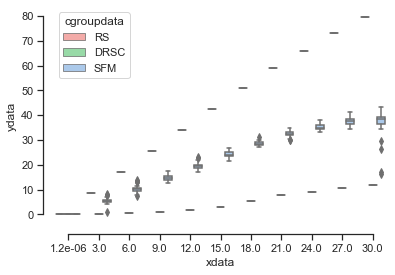

In [4]:
sns.set_theme(style="ticks", palette="pastel")
filename = 'Error_Wy.csv'
data = pd.read_csv(root_path+filename, header=1, names=['xdata', 'ydata', 'cgroupdata'], 
                   dtype={'xdata': np.float16, 'ydata':np.float32, 'cgroupdata':str})

# Draw a nested boxplot to show bills by day and time
ax = sns.boxplot(x="xdata", y="ydata", data=data,
            hue="cgroupdata", palette=["r", "g","b"])
sns.despine(offset=10, trim=True)
ticks, _ = plt.xticks()
pl = ax.plot(ticks, data_rs[1][0,:],'tab:orange')

ax.legend([lp[0], ax['boxes'][0], ax['boxes'][0]], ['rs',"drsc", "sfm"], loc='upper left')

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# generate dataframe for boxplot
x, y, category = list(), list(), list()
for i in range(5):
    for j in range(10):
        for k in ['Yes', 'No']:
            x.append(i)
            y.append(np.random.rand(1)[0])
            category.append(k)

df_for_boxplot = pd.DataFrame({
    'X': x,
    'Y': y,
    'category': category
})

# generate data for line plot
data_for_line_plot = np.arange(5)*0.2

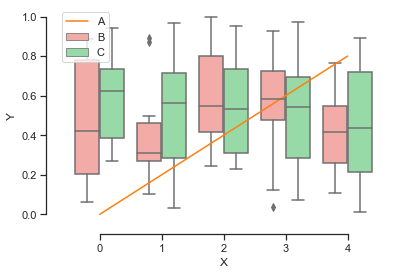

In [114]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(x="X", y="Y", data=df_for_boxplot,
                 hue="category", palette=['r', 'g','b'])
sns.despine(offset=10, trim=True)

ticks = ax.get_xticks()
pl = ax.plot(ticks, data_for_line_plot,'tab:orange', label="C")

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['A','B','C'], loc='upper left')

In [104]:
handles

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

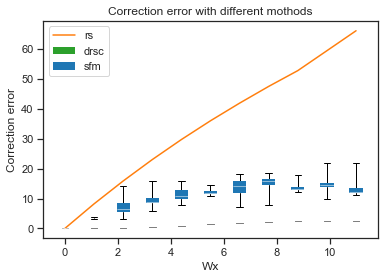

In [153]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Wx', 'Correction error'
filename = 'Error_Wx.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

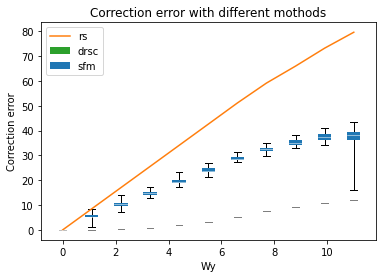

In [5]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Wy', 'Correction error'
filename = 'Error_Wy.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

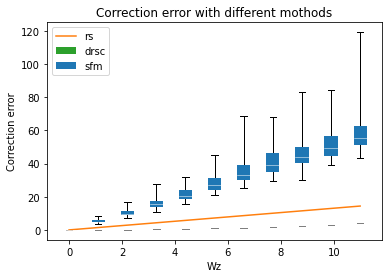

In [6]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Wz', 'Correction error'
filename = 'Error_Wz.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

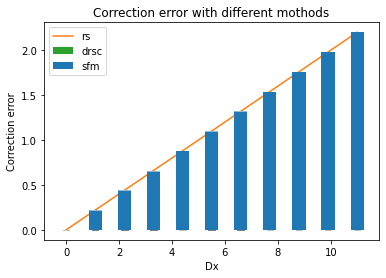

In [7]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Dx', 'Correction error'
filename = 'Error_Dx.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

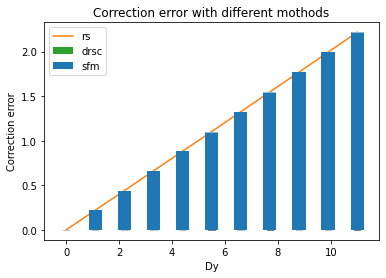

In [8]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Dy', 'Correction error'
filename = 'Error_Dy.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

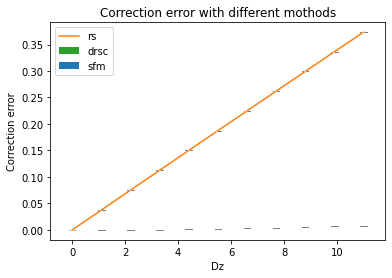

In [9]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Dz', 'Correction error'
filename = 'Error_Dz.csv' 
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

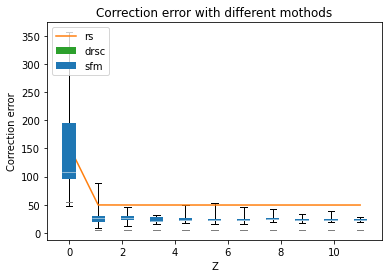

In [10]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Z', 'Correction error'
filename = 'Error_Z.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

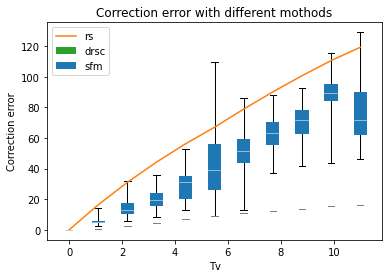

In [11]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Tv', 'Correction error'
filename = 'Error_Tv.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

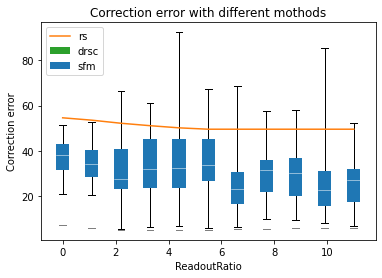

In [12]:
title, xlabel,ylabel = 'Correction error with different mothods', 'ReadoutRatio', 'Correction error'
filename = 'Error_readoutRatio.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

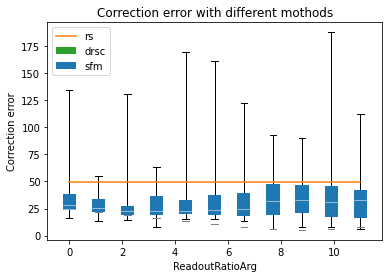

In [13]:
title, xlabel,ylabel = 'Correction error with different mothods', 'ReadoutRatioArg', 'Correction error'
filename = 'Error_readoutRatioArg.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel)

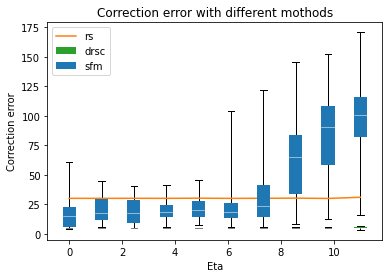

In [14]:
title, xlabel,ylabel = 'Correction error with different mothods', 'Eta', 'Correction error'
filename = 'Error_Eta.csv'
data_rs, data_drsc, data_sfm = load_data(root_path+filename, vec_num=10)
fig, ax = plt.subplots()
box_plot_helper(ax, data_rs, data_drsc, data_sfm, title, xlabel,ylabel, vec_num=10)

In [15]:
!ls $root_path

Error_Dx.csv   Error_Noise.csv		  Error_Wx.csv	linechart
Error_Dy.csv   Error_readoutRatioArg.csv  Error_Wy.csv
Error_Dz.csv   Error_readoutRatio.csv	  Error_Wz.csv
Error_Eta.csv  Error_Tv.csv		  Error_Z.csv
